In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Krishnan Unni Prasad\Downloads\SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.shape

(9994, 13)

In [4]:
df=df.drop(columns=["Postal Code","Country"])
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
profit_det=df.groupby(['Region','State'],as_index=False)["Profit"].sum()
profit_det.sort_values(by='Region',inplace=True)
profit_det.head()

,Region,State,Profit
0,Central,Illinois,-12607.8870
12,Central,Wisconsin,8401.8004
11,Central,Texas,-25729.3563
10,Central,South Dakota,394.8283
8,Central,North Dakota,230.1497


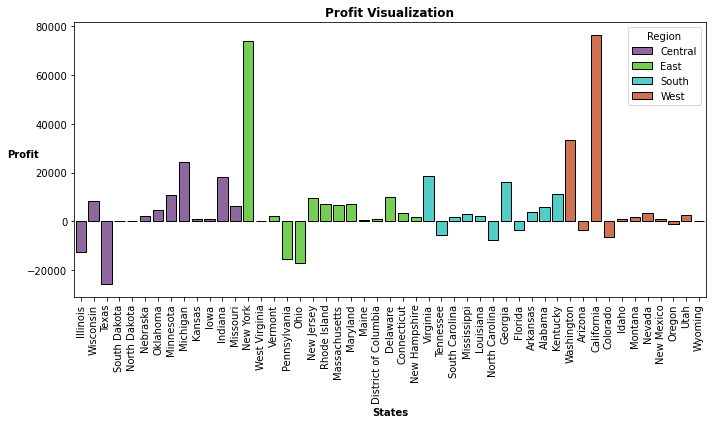

In [8]:
fig,profit_sh=plt.subplots(figsize=(10,6))
clr={'Central':'#935EA8','East':'#6BE33D','South':'#3DE3DC','West':'#E3683D'}
sns.barplot(data=profit_det, x=profit_det.State, y='Profit', hue=profit_det["Region"], palette=clr, dodge=False, edgecolor='black')
profit_sh.set_title(label="Profit Visualization",fontweight='bold')
profit_sh.set_xlabel('States',fontweight='bold')
profit_sh.set_xticklabels(labels=profit_det["State"],rotation=90)
profit_sh.set_ylabel("Profit",rotation=0,fontweight='bold')
plt.tight_layout()

In [9]:
state_ls=df.loc[df.Profit < 0]
region_ls=state_ls.groupby("Region",as_index=False)["Profit"].sum()
region_ls

,Region,Profit
0,Central,-56314.8850
1,East,-49590.6075
2,South,-27504.8323
3,West,-22720.9609


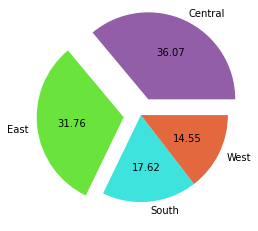

In [10]:
clr=["#935EA8","#6BE33D","#3DE3DC","#E3683D"]
region_ls['Profit']=region_ls['Profit'].abs()
region_lssh=plt.pie(x='Profit',data=region_ls,labels="Region",colors=clr,autopct="%.2f",explode=[0.2,0.2,0,0])

In [11]:
center_ls=state_ls.groupby(['Region','State'],as_index=True)["Profit"].sum()
center_ls=center_ls.drop(['East','West','South'])
center_ls=center_ls.to_frame()
center_ls.reset_index(inplace = True)
center_ls.sort_values(by=["Profit"])
center_ls

,Region,State,Profit
0,Central,Illinois,-19501.6975
1,Central,Texas,-36813.1875


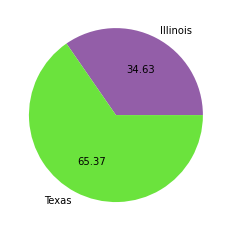

In [12]:
center_ls['Profit']=center_ls['Profit'].abs()
center_lssh=plt.pie(x='Profit',data=center_ls,labels="State",colors=clr,autopct="%.2f")

In [13]:
df_ls=state_ls.groupby(['Region','Ship Mode','State','Category','Sub-Category','Sales','Quantity','Discount'])["Profit"].sum()
center_ls=df_ls.drop(['East','West','South'])
center_ls=center_ls.to_frame()
center_ls.reset_index(inplace = True)
cstate_ls=center_ls.groupby(['State','Ship Mode','Region','Category','Sub-Category','Sales','Quantity','Discount'])["Profit"].sum()
cstate_ls=cstate_ls.drop(['Illinois'])
cstate_ls=cstate_ls.to_frame()
cstate_ls.reset_index(inplace = True)
cstate_ls.sort_values(by=["Profit"])
cstate_ls

,State,Ship Mode,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Texas,First Class,Central,Furniture,Bookcases,89.0664,1,0.32,-17.0274
1,Texas,First Class,Central,Furniture,Bookcases,156.3728,2,0.32,-52.8908
2,Texas,First Class,Central,Furniture,Bookcases,241.3320,5,0.32,-14.1960
3,Texas,First Class,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
4,Texas,First Class,Central,Furniture,Bookcases,409.9992,3,0.32,-96.4704
...,...,...,...,...,...,...,...,...,...
471,Texas,Standard Class,Central,Technology,Machines,418.8000,2,0.40,-97.7200
472,Texas,Standard Class,Central,Technology,Machines,559.7100,3,0.40,-121.2705
473,Texas,Standard Class,Central,Technology,Machines,998.8500,5,0.40,-199.7700
474,Texas,Standard Class,Central,Technology,Machines,1439.9820,3,0.40,-263.9967


In [14]:
cscat_det=cstate_ls.drop('Sub-Category',axis=1)
cscat_det=cscat_det.groupby(['State','Region','Category']).sum()
cscat_det

Sales  Quantity  Discount      Profit
State Region  Category                                                  
Texas Central Furniture        56202.466       712     80.02 -10478.0759
              Office Supplies  23812.836       981    169.80 -23136.7731
              Technology       20943.934       128      8.80  -3198.3385

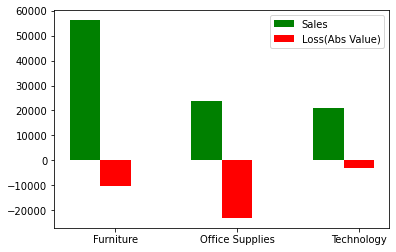

In [15]:
cscat_det1=cscat_det
N = 3
ind = np.arange(N) 
w = 0.25
bar1=plt.bar(ind, cscat_det1['Sales'], w,color = 'g')
bar2=plt.bar(ind +w, cscat_det1['Profit'], w,color = 'r')
plt.xticks(ind+w,['Furniture','Office Supplies','Technology'])
plt.legend( (bar1,bar2), ('Sales','Loss(Abs Value)') )
plt.show()

In [16]:
csubcat_det=cstate_ls.groupby(['Category','Ship Mode','State','Region','Sub-Category','Sales','Quantity','Discount'])["Profit"].sum()
csubcat_det=csubcat_det.drop(['Furniture','Technology'])
csubcat_det=csubcat_det.to_frame()
csubcat_det.reset_index(inplace = True)
csubcat_det1=csubcat_det.groupby(['State','Region','Category','Sub-Category']).sum()
csubcat_det1.abs()

Sales  Quantity  Discount  \
State Region  Category        Sub-Category                                 
Texas Central Office Supplies Appliances    2407.814     159.0      37.6   
                              Binders       9039.742     623.0     121.6   
                              Fasteners       39.960      13.0       0.6   
                              Storage       8029.376     149.0       8.0   
                              Supplies      4295.944      37.0       2.0   

                                                Profit  
State Region  Category        Sub-Category              
Texas Central Office Supplies Appliances     6147.2225  
                              Binders       14705.0738  
                              Fasteners         8.6613  
                              Storage        1417.2783  
                              Supplies        858.5372

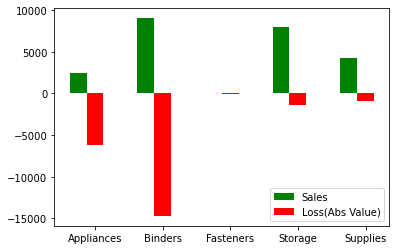

In [17]:
N = 5
ind = np.arange(N) 
w = 0.25
bar1=plt.bar(ind, csubcat_det1['Sales'], w,color = 'g')
bar2=plt.bar(ind +w, csubcat_det1['Profit'], w,color = 'r')
plt.xticks(ind+w,['Appliances','Binders','Fasteners','Storage','Supplies'])
plt.legend( (bar1,bar2), ('Sales','Loss(Abs Value)') )
plt.show()

In [18]:
csubcat_det2=csubcat_det.groupby(['State','Region','Category','Ship Mode']).sum()
csubcat_det2.abs()

Sales  Quantity  Discount  \
State Region  Category        Ship Mode                                       
Texas Central Office Supplies First Class      2060.662     111.0      22.8   
                              Same Day          817.558      40.0       7.8   
                              Second Class     1378.694     127.0      23.4   
                              Standard Class  19555.922     703.0     115.8   

                                                  Profit  
State Region  Category        Ship Mode                   
Texas Central Office Supplies First Class      2976.2730  
                              Same Day          545.9758  
                              Second Class     2371.4366  
                              Standard Class  17243.0877

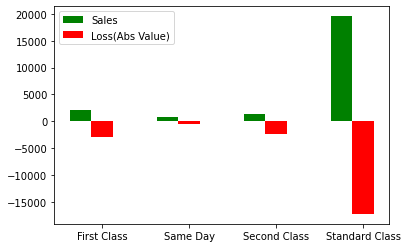

In [19]:
N = 4
ind = np.arange(N) 
w = 0.25
bar1=plt.bar(ind, csubcat_det2['Sales'], w,color = 'g')
bar2=plt.bar(ind +w, csubcat_det2['Profit'], w,color = 'r')
plt.xticks(ind+w,['First Class','Same Day','Second Class','Standard Class'])
plt.legend( (bar1,bar2), ('Sales','Loss(Abs Value)') )
plt.show()

In [20]:
csubcat_det3=csubcat_det.groupby(['Ship Mode','State','Region','Category','Sub-Category']).sum()
csubcat_det3=csubcat_det3.drop(['First Class','Same Day','Second Class'])
csubcat_det3

Sales  Quantity  \
Ship Mode      State Region  Category        Sub-Category                       
Standard Class Texas Central Office Supplies Appliances    1703.150       103   
                                             Binders       6541.996       441   
                                             Fasteners       33.912         9   
                                             Storage       6982.664       114   
                                             Supplies      4294.200        36   

                                                           Discount  \
Ship Mode      State Region  Category        Sub-Category             
Standard Class Texas Central Office Supplies Appliances        26.4   
                                             Binders           80.8   
                                             Fasteners          0.4   
                                             Storage            6.4   
                                             Supplies           1.8   

                                                               Profit  
Ship Mode      State Region  Category        Sub-Category              
Standard Class Texas Central Office Supplies Appliances    -4325.0215  
                                             Binders      -10817.4098  
                                             Fasteners        -7.3005  
                                             Storage       -1235.1675  
                                             Supplies       -858.1884

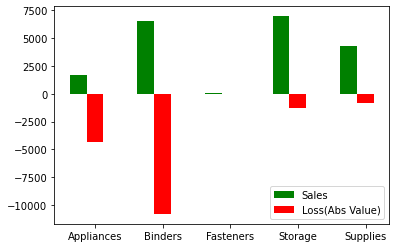

In [21]:
N = 5
ind = np.arange(N) 
w = 0.25
bar1=plt.bar(ind, csubcat_det3['Sales'], w,color = 'g')
bar2=plt.bar(ind +w, csubcat_det3['Profit'], w,color = 'r')
plt.xticks(ind+w,['Appliances','Binders','Fasteners','Storage','Supplies'])
plt.legend( (bar1,bar2), ('Sales','Loss(Abs Value)') )
plt.show()